<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DDDM/blob/main/shapley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A bit of this and a bit of that

We explore an XAI library based on computing Shapley values (yes, the same ones from Module 4).

[Documentation](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [ ]:
!pip install shap

In [ ]:
import shap
n = 1000
X, y = shap.datasets.california(n_points = n)
print(X[:5], y[:5])

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14740  4.1518      22.0  5.663073   1.075472      1551.0  4.180593     32.58   
10101  5.7796      32.0  6.107226   0.927739      1296.0  3.020979     33.92   
20566  4.3487      29.0  5.930712   1.026217      1554.0  2.910112     38.65   
2670   2.4511      37.0  4.992958   1.316901       390.0  2.746479     33.20   
15709  5.0049      25.0  4.319261   1.039578       649.0  1.712401     37.79   

       Longitude  
14740    -117.05  
10101    -117.97  
20566    -121.84  
2670     -115.60  
15709    -122.43   [1.369 2.413 2.007 0.725 4.6  ]


Note that some of these attributes are logarithmic and/or normalized (c.f. [data source](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)).

That *y* is the natural logarithm of the median home price as it exceeds 100k as multiples of 10k, and rounded, too. Let's try recover approximate dollar prices by inverting that, although any rounding of the *y* values in the `shap` package will cause deviations.

In [ ]:
from math import exp
print([round(1000 + 100 * exp(v)) * 100 for v in y[:5]])

[139300, 211700, 174400, 120600, 1094800]


In [ ]:
# split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
for i in range(X.shape[1]):
    print(X.columns[i], model.coef_[i].round(5))

MedInc 0.40387
HouseAge 0.00854
AveRooms -0.10839
AveBedrms 0.61445
Population 2e-05
AveOccup -0.22254
Latitude -0.48011
Longitude -0.48145


In [ ]:
y_pred = model.predict(X_test)

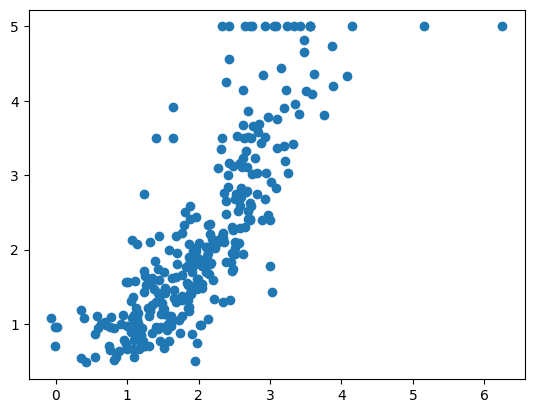

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)

In [ ]:
bg = shap.utils.sample(X, 50)  # background distribution
explainer = shap.Explainer(model.predict, bg)
shap_values = explainer(X[:500]) # using less makes this faster although less precise

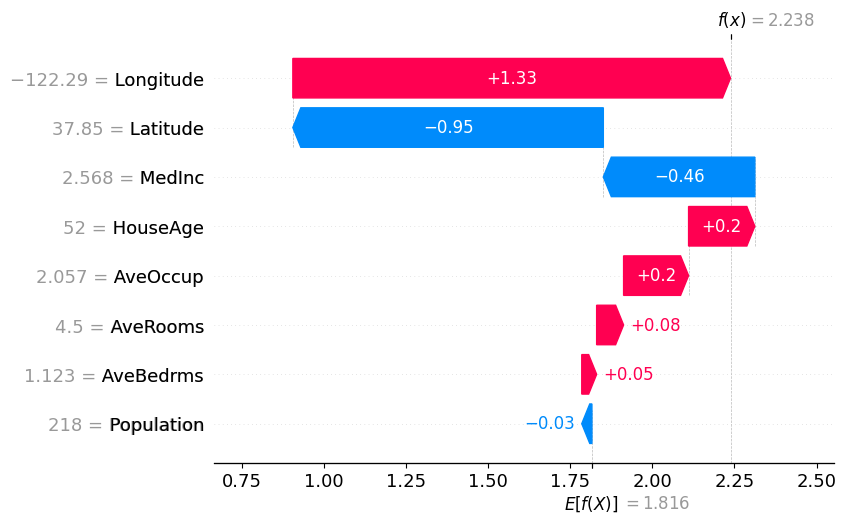

In [ ]:
pos = 5
shap.plots.waterfall(shap_values[pos], max_display = 12)

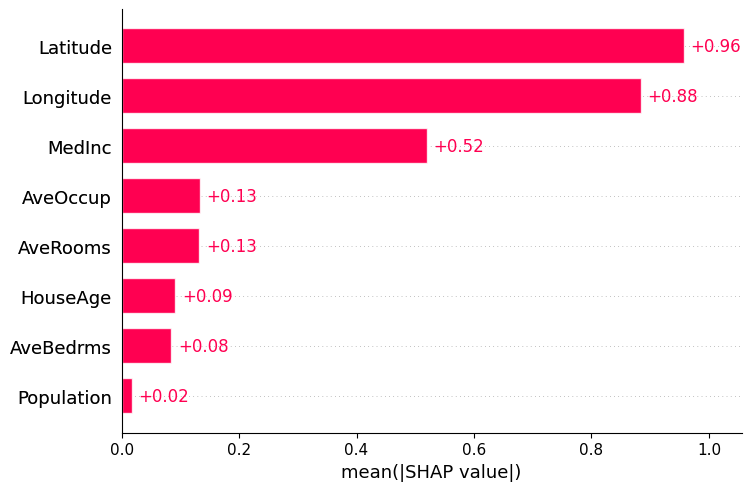

In [ ]:
shap.plots.bar(shap_values)

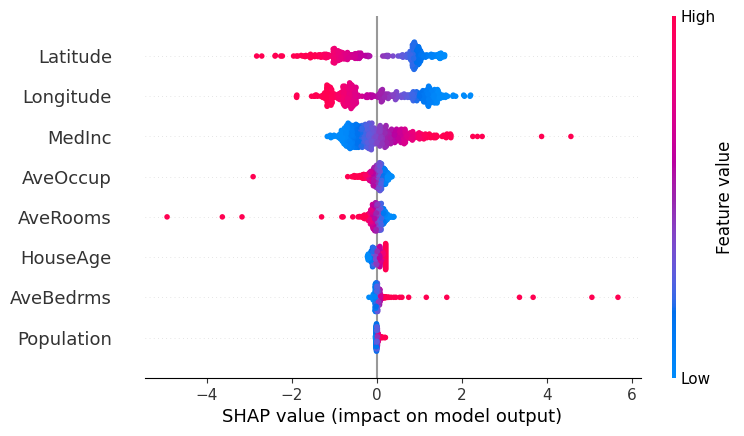

In [ ]:
shap.plots.beeswarm(shap_values)

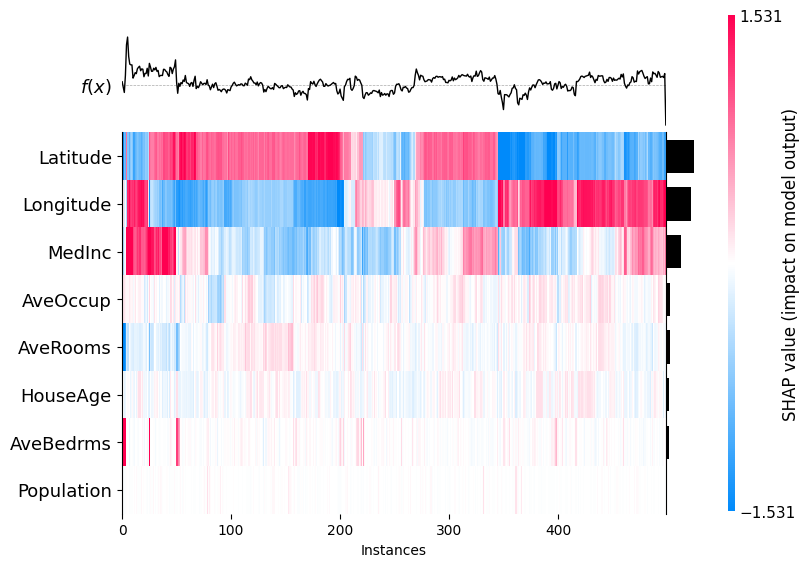

In [ ]:
shap.plots.heatmap(shap_values)